<a href="https://colab.research.google.com/github/DayanHafeez/Boston-Housing-Model/blob/main/boston_housing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Model for Boston Housing Data set from Keras


You can view the Dataset on this website: [Boston Housing Dataset](https://lib.stat.cmu.edu/datasets/boston)

Firstly, I'll preprocess the data, we'll normalizing the data using `MinMaxScaler()`
All columns except a CHAS and MEDV are Normalized.




In [15]:
# Preprocessing the data (normalizing or standardization)
from sklearn.compose import make_column_transformer  # for making a multistep data processing function for the transformations you need
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf



ct = make_column_transformer(
    (MinMaxScaler(), [0,1,2,4,5,6,7,8,9,10,12,11]) # normalizing data
)

(b_x_train, b_y_train), (b_x_test, b_y_test) = tf.keras.datasets.boston_housing.load_data( test_split=0.2, seed=113)
ct.fit(b_x_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
b_x_train_normal = ct.transform(b_x_train)
b_x_test_normal = ct.transform(b_x_test)

**Creating the Model**

In [16]:
tf.random.set_seed(42)

# creating the model
boston_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# compiling the model
boston_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=[tf.keras.losses.mae]
)

boston_history = boston_model.fit(b_x_train_normal,b_y_train, epochs=100, verbose=0)

Plotting the Loss vs Epochs Plot

Text(0, 0.5, 'loss')

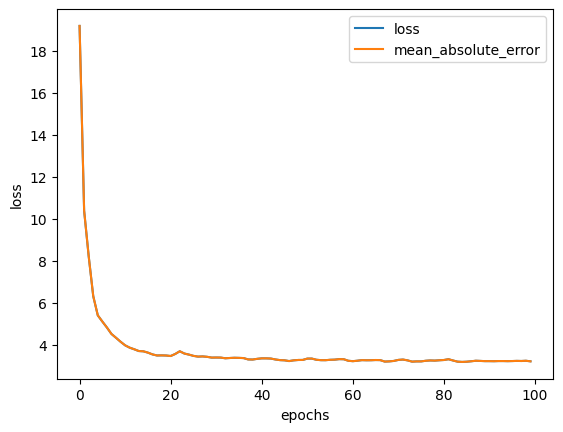

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(boston_history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

Evaluating the model on test data

In [18]:
boston_model.evaluate(b_x_test_normal,b_y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9357 - mean_absolute_error: 2.9357  


[3.123077392578125, 3.123077392578125]